# 数据线性关系的可视化

In [6]:
%matplotlib inline

In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))

In [9]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 线性回归模型

In [11]:
# sns.regplot?

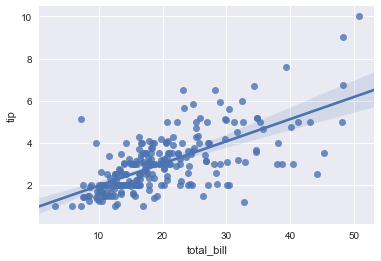

In [10]:
sns.regplot(x="total_bill", y="tip", data=tips);

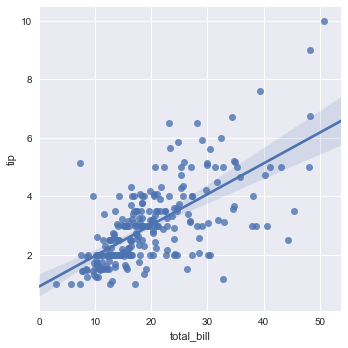

In [12]:
sns.lmplot(x="total_bill", y="tip", data=tips);

** sns.regplot() vs sns.lmplot() **
* 相同:
    * 绘制两变量的散点图并拟合回归曲线并绘制95%置信区间
    * 共享主要的绘图内核函数
* 不同:
    * 图的形状不同
    * 接受的参数不同
        * .regplot()，接受多种类型的数据结构，ndarray，series，objects
        * .lmplot()，只接受字符串，也就是x，y必须指定为字符串，及DataFrame中的变量名放在引号中。

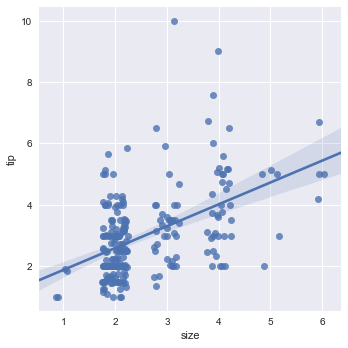

In [15]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.25);

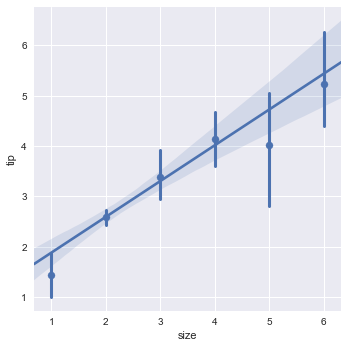

In [8]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

## 拟合不同类型的模型

In [20]:
anscombe = sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


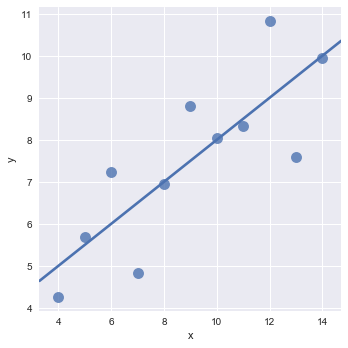

In [21]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), ci=None, scatter_kws={"s": 120});

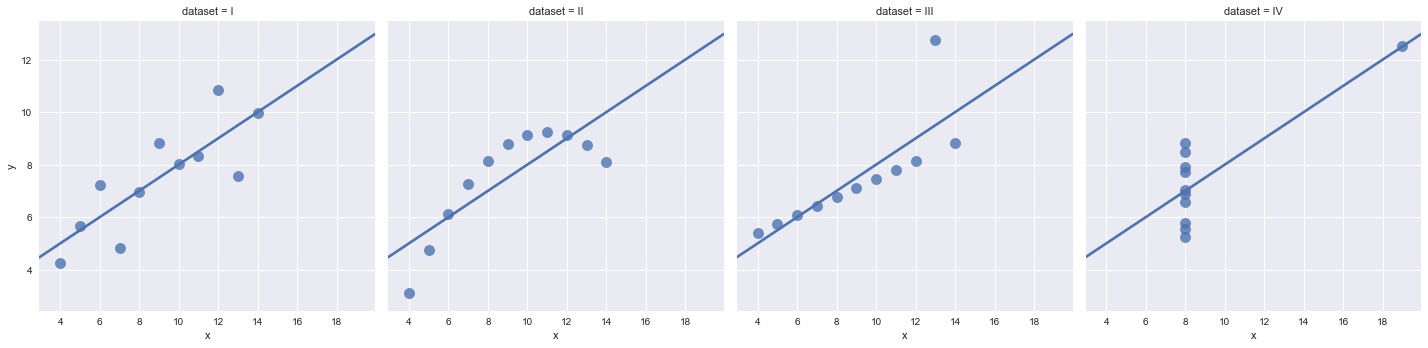

In [22]:
sns.lmplot(x="x", y="y", data=anscombe, ci=None, scatter_kws={"s": 120}, col="dataset");

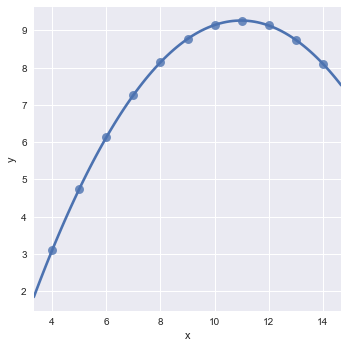

In [23]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=2, ci=None, scatter_kws={"s": 80});

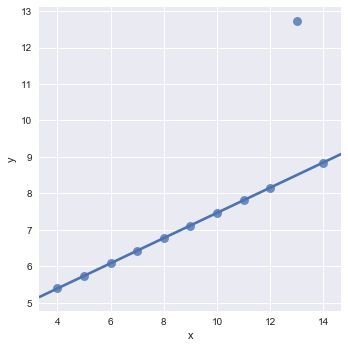

In [24]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), robust=True, ci=None, scatter_kws={"s": 80});

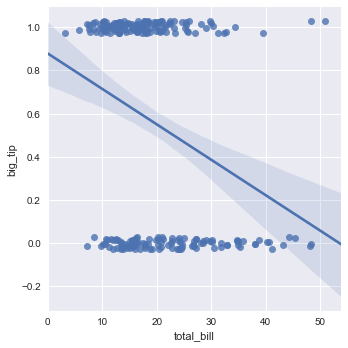

In [25]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15  # tips超过总账单的15%
sns.lmplot(x="total_bill", y="big_tip", data=tips, y_jitter=.03);

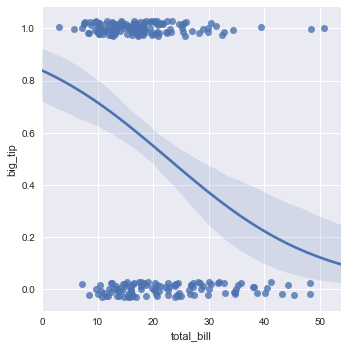

In [26]:
# y="big_tip" 是二值变量，所以我们可以拟合logistic regression
sns.lmplot(x="total_bill", y="big_tip", data=tips, logistic=True, y_jitter=.03);

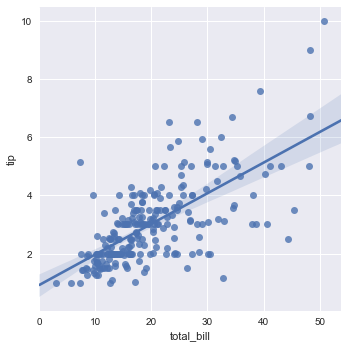

In [30]:
sns.lmplot(x="total_bill", y="tip", data=tips, lowess=False);

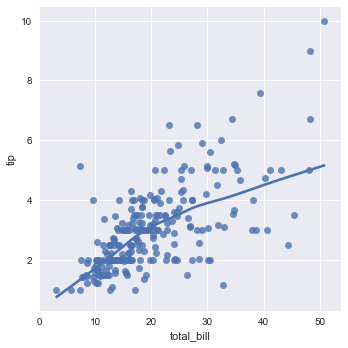

In [29]:
sns.lmplot(x="total_bill", y="tip", data=tips, lowess=True);

### 残差图

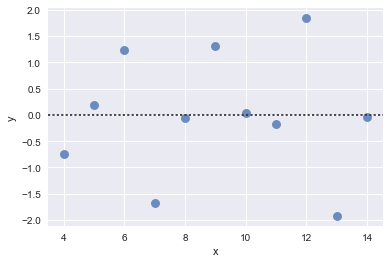

In [31]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), scatter_kws={"s": 80});

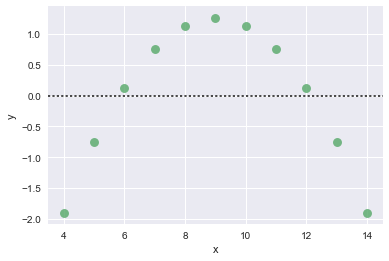

In [32]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), scatter_kws={"s": 80}, color="g");

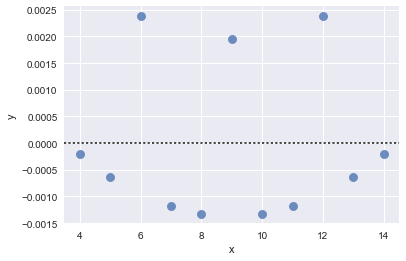

In [33]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=2, scatter_kws={"s": 80});

## 以其他变量分组后拟合模型

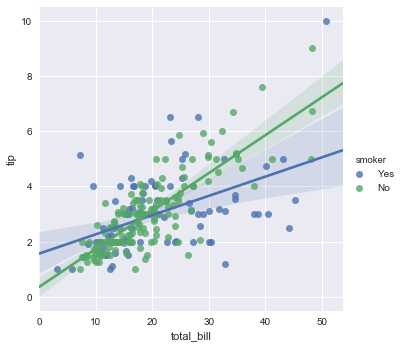

In [34]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

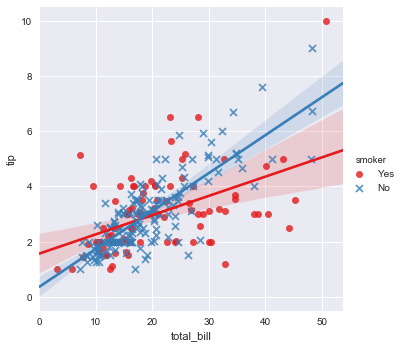

In [35]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o", "x"], palette="Set1");

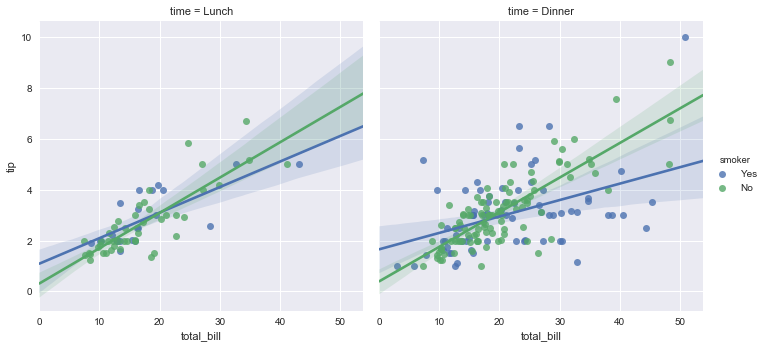

In [36]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

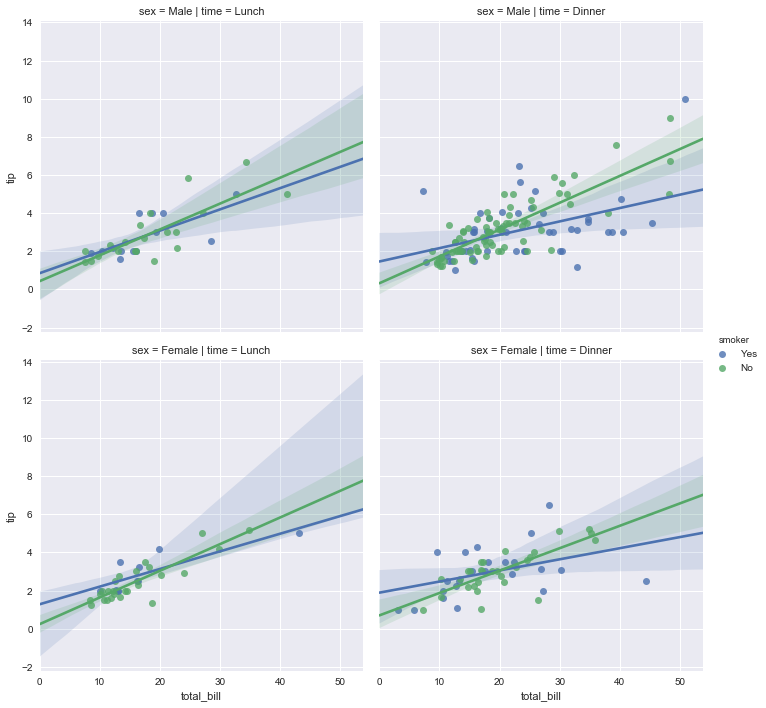

In [28]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", row="sex", data=tips);

## 设置图形的大小和形状

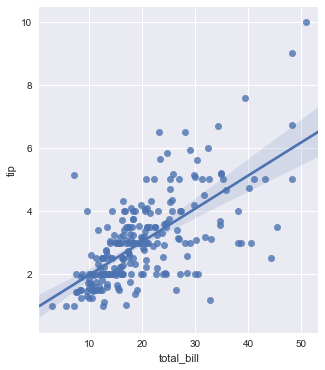

In [37]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

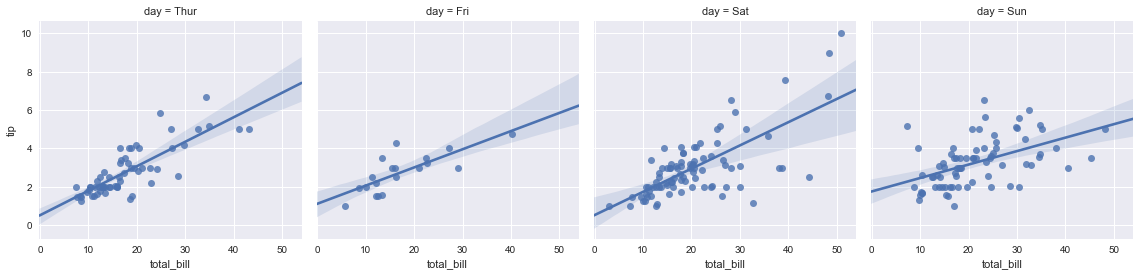

In [42]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips, col_wrap=4, size=4);

In [38]:
sns.lmplot?

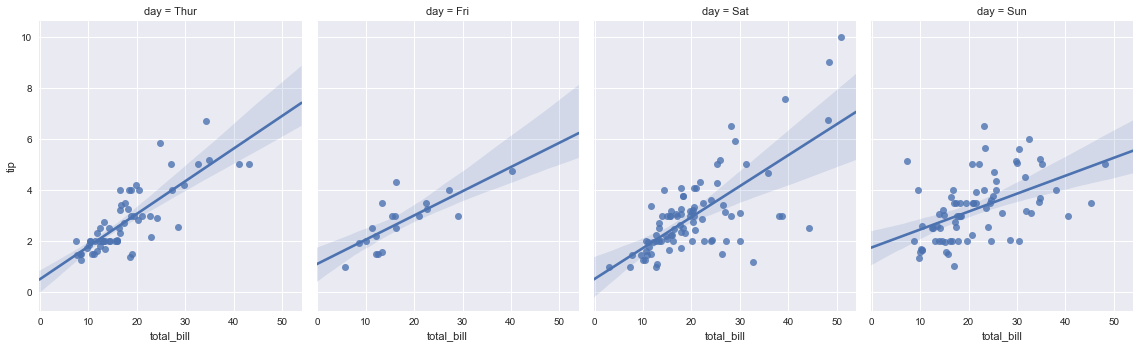

In [43]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips, aspect=.8);
# size, 高
# aspect, 屏幕高宽比

## 在其他上下文中绘制回归图

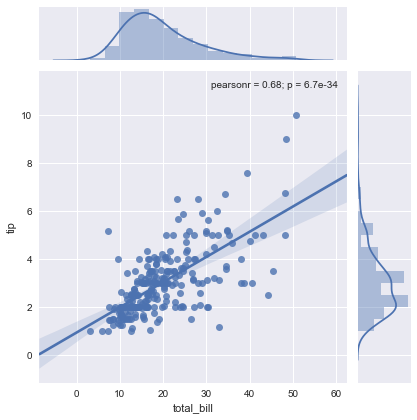

In [44]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

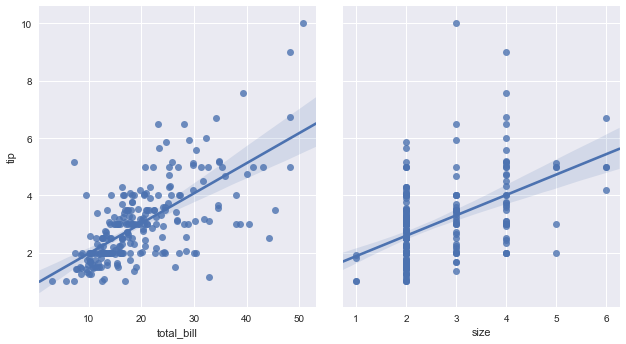

In [45]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"], size=5, aspect=.9, kind="reg");

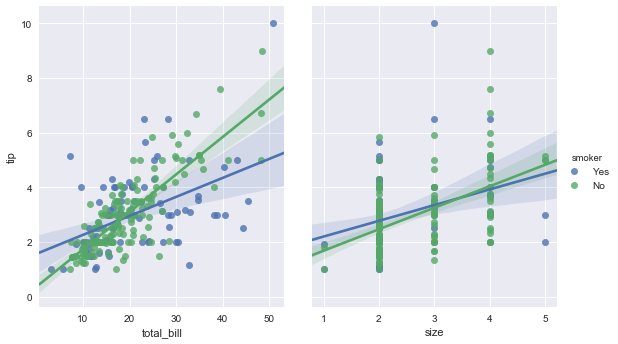

In [46]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=5, aspect=.8, kind="reg");